# Assignment 3: Diabetes Classification and PCA Visualization

## Objective

The goal of this assignment is to build a machine learning classifier that predicts whether a patient is diabetic or not using the Pima Indians Diabetes dataset from Kaggle, and to identify which input features are most important. In addition, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the data and visualize the top two principal components.

---

## Dataset

I used the **Pima Indians Diabetes Database** from Kaggle.  
Each row in the dataset represents a patient, and each column is a medical feature, such as:

- Pregnancies  
- Glucose  
- BloodPressure  
- SkinThickness  
- Insulin  
- BMI  
- DiabetesPedigreeFunction  
- Age  

The target column **`Outcome`** indicates whether the patient is diabetic (`1`) or not (`0`).

The dataset is a **tabular** dataset (not images), so each feature represents a numerical medical measurement rather than pixel values.

---

## Libraries Used

- **NumPy (`numpy`)**: for numerical operations and arrays, used internally by other libraries.
- **Pandas (`pandas`)**: for loading and handling tabular data from the CSV file using DataFrames.
- **Matplotlib (`matplotlib.pyplot`)**: for plotting graphs such as feature importance bar charts and PCA scatter plots.
- **Scikit-Learn (`sklearn`)**:
  - `train_test_split` from `sklearn.model_selection` to split the dataset into training and test sets.
  - `StandardScaler` from `sklearn.preprocessing` to normalize features so that they have zero mean and unit variance.
  - `RandomForestClassifier` from `sklearn.ensemble` as the main classification model.
  - `accuracy_score`, `confusion_matrix`, and `classification_report` from `sklearn.metrics` to evaluate model performance.
  - `PCA` from `sklearn.decomposition` to perform Principal Component Analysis and reduce the data to two dimensions for visualization.

---

## Methodology

1. **Data Loading**

   I loaded the CSV file (`diabetes.csv`) into a Pandas DataFrame using `pd.read_csv()`. I inspected the data using functions like `head()`, `info()`, and `describe()` to understand its structure and basic statistics.

2. **Feature and Target Separation**

   I separated the input features and the target label:
   - `X` contains all columns except `Outcome`.
   - `y` contains only the `Outcome` column.

   This prepares the data in the form `(X, y)` required by most scikit-learn models.

3. **Train–Test Split**

   I used `train_test_split()` to divide the data into:
   - **Training set (80%)**: used to train the model.
   - **Test set (20%)**: used to evaluate how well the model generalizes to unseen data.

   I used `stratify=y` so that the proportion of diabetic and non-diabetic patients is similar in both the training and test sets.

4. **Feature Scaling**

   I applied `StandardScaler` to normalize the features:
   - The scaler learns the mean and standard deviation from the training data (`fit`).
   - It then transforms both the training and test data so that each feature has approximately zero mean and unit variance.

   Although Random Forests are not very sensitive to feature scaling, this step is good practice and is especially useful for PCA later.

5. **Model Training: Random Forest Classifier**

   I used `RandomForestClassifier` with 100 trees (`n_estimators=100`).  
   A Random Forest is an ensemble of decision trees where each tree makes a prediction, and the final prediction is obtained by majority voting.

   - I trained the model using `rf_model.fit(X_train_scaled, y_train)`.
   - Then I used `rf_model.predict(X_test_scaled)` to generate predictions on the test set.

6. **Model Evaluation**

   I evaluated the classifier using:
   - **Accuracy**: the proportion of correct predictions on the test set.
   - **Confusion Matrix**: to see true positives, true negatives, false positives, and false negatives.
   - **Classification Report**: which includes precision, recall, and F1-score for each class (diabetic vs non-diabetic).

   These metrics provide a detailed view of how well the model distinguishes between diabetic and non-diabetic patients.

7. **Feature Importance Analysis**

   Random Forest provides a built-in measure of feature importance through `rf_model.feature_importances_`. I used this to identify which features contribute most to the model’s decisions.

   I created a DataFrame pairing each feature name with its importance score, sorted it in descending order, and plotted a horizontal bar chart. This allowed me to interpret which medical measurements (e.g., Glucose, BMI, Age) are most influential in predicting diabetes in this dataset.

8. **PCA and Visualization of Top Two Components**

   To visualize the data in two dimensions, I applied **Principal Component Analysis (PCA)** with `n_components=2` on the scaled features:

   - PCA finds new axes (principal components) that capture the maximum variance in the data.
   - I fitted PCA on the scaled feature matrix and obtained a transformed matrix with two principal components for each patient.

   I then created a 2D scatter plot of:
   - **PC1 (x-axis)** and **PC2 (y-axis)**.
   - Points colored by the `Outcome` (diabetic vs not diabetic).

   This visualization helps to see how the data is distributed in a reduced 2D space and whether diabetic and non-diabetic patients show any clustering patterns.

---

## Summary

In this assignment I performed the following tasks:

- Loaded and explored the Pima Indians Diabetes dataset.
- Prepared the data by separating features and labels, splitting into training and test sets, and scaling the features.
- Trained a Random Forest classifier to predict whether a patient is diabetic.
- Evaluated the classifier using accuracy, confusion matrix, and detailed classification metrics.
- Investigated feature importance to understand which medical features are most relevant for predicting diabetes.
- Applied PCA to reduce the data to two principal components and visualized the data in 2D, colored by diabetic status.

This pipeline demonstrates a complete supervised learning workflow, from data preprocessing and model training to interpretation and visualization.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


In [4]:
# loading the csv file
df = pd.read_csv("diabetes.csv")

#checking  first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Features = all columns except 'Outcome' since it tells wether a patient is diabetic or not
X = df.drop("Outcome", axis=1)

# Target = 'Outcome' either 1(diabetic ) or 0 (non diabetic)
y = df["Outcome"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (768, 8)
Target shape: (768,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80% training, 20% testing using the train_test_split() as it divides data in to train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (fit on train, apply on both)
#all features have different scale and we dont want data to be baised to big number so we bring all features to common scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #apply that scaling to training data
X_test_scaled = scaler.transform(X_test) # apply same scaling to test data


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(  #we have used randomforest as calssifier
    n_estimators=100,  # number of trees
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7597402597402597

Confusion Matrix:
 [[85 15]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [8]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Put into DataFrame for nice view
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp_df


,Feature,Importance
1,Glucose,0.276009
5,BMI,0.159544
7,Age,0.127248
6,DiabetesPedigreeFunction,0.126731
2,BloodPressure,0.085606
0,Pregnancies,0.084456
4,Insulin,0.072409
3,SkinThickness,0.067997


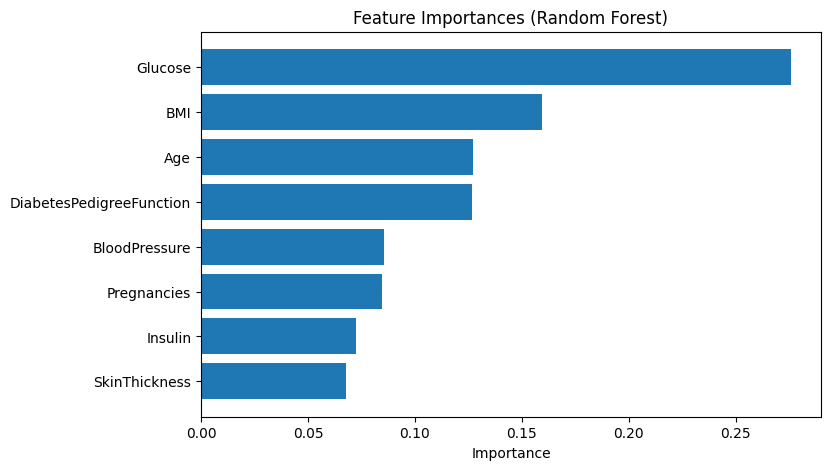

In [9]:
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()


In [10]:
from sklearn.decomposition import PCA

# Use the scaled full dataset for PCA (not just train)
X_scaled_full = scaler.fit_transform(X)  # re-fit on all data if you want

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.26179749 0.21640127]


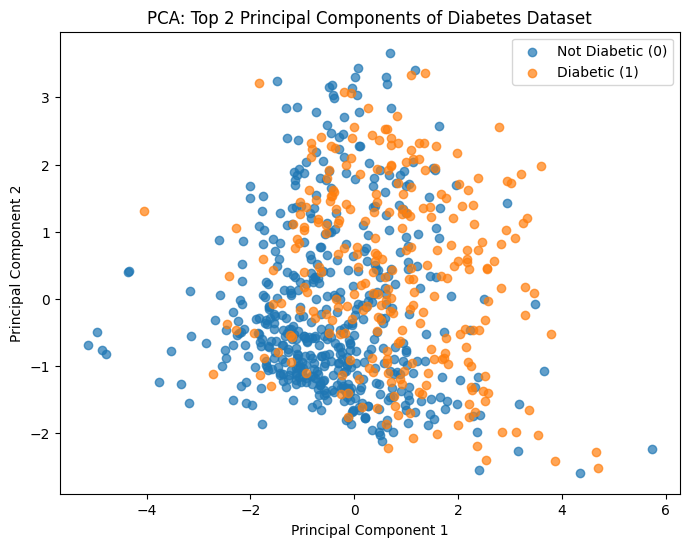

In [11]:
plt.figure(figsize=(8,6))

# We need colors for 0 and 1
outcome = y.values

plt.scatter(
    X_pca[outcome == 0, 0], X_pca[outcome == 0, 1],
    label="Not Diabetic (0)", alpha=0.7
)
plt.scatter(
    X_pca[outcome == 1, 0], X_pca[outcome == 1, 1],
    label="Diabetic (1)", alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Top 2 Principal Components of Diabetes Dataset")
plt.legend()
plt.show()


In [12]:
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=["PC1", "PC2"]
)
pca_components


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.128432,0.393083,0.360003,0.439824,0.435026,0.451941,0.270611,0.198027
PC2,0.593786,0.174029,0.183892,-0.331965,-0.250781,-0.100960,-0.122069,0.620589
